In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import calendar
import seaborn as sns

## Read Pre processed data 

In [2]:
colombo_df = pd.read_csv('DataSets/ColomboData.csv')
kandy_df = pd.read_csv('DataSets/KandyData.csv')
bibile_df = pd.read_csv('DataSets/BibileData.csv')
nuwaraEliya_df = pd.read_csv('DataSets/NuwaraEliyData.csv')
deniyaya_df = pd.read_csv('DataSets/DeniyayaData.csv')
jaffna_df = pd.read_csv('DataSets/JaffnaData.csv')
kurunegala_df = pd.read_csv('DataSets/KurunegalaData.csv')

In [3]:
data = pd.concat([colombo_df, kandy_df, bibile_df, kurunegala_df, deniyaya_df, jaffna_df, nuwaraEliya_df])
data = data.drop(columns=['Unnamed: 0'])
data["Current Date"]= pd.to_datetime(data["Current Date"])

In [4]:
# Identify and compare HCHO emissions during lockdown periods
lockdown_start_date = pd.to_datetime('2020-03-01')
lockdown_end_date = pd.to_datetime('2021-12-31')

lockdown_df = data[(data['Current Date'] >= lockdown_start_date) & (data['Current Date'] <= lockdown_end_date)]
lockdown_mean_hcho = lockdown_df.groupby('Location')['HCHO reading'].mean()

# Compare mean HCHO readings before and during lockdown
before_lockdown_mean = data[data['Current Date'] < lockdown_start_date]['HCHO reading'].mean()
during_lockdown_mean = lockdown_df['HCHO reading'].mean()
after_lockdown_mean = data[data['Current Date'] > lockdown_end_date]['HCHO reading'].mean()

print(f'Mean HCHO reading before lockdown: {before_lockdown_mean}')
print(f'Mean HCHO reading during lockdown: {during_lockdown_mean}')
print(f'Mean HCHO reading after lockdown: {after_lockdown_mean}')

Mean HCHO reading before lockdown: 0.00011231546127134448
Mean HCHO reading during lockdown: 0.00010116455966118859
Mean HCHO reading after lockdown: 0.00010713244009483929


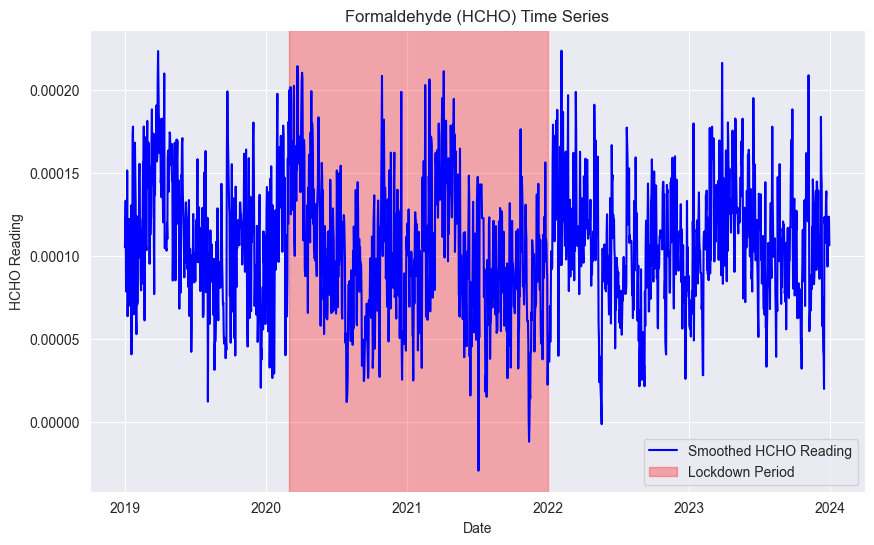

In [5]:
# Aggregate data by date and take the mean of HCHO readings for each day
data_aggregated = data.groupby('Current Date')['HCHO reading'].mean().reset_index()

# Sort the aggregated DataFrame by date
data_sorted = data_aggregated.sort_values(by='Current Date')

# Plot the time series data (Date vs HCHO readings) with a smoother curve
plt.figure(figsize=(10, 6))

# Smoothing the curve with interpolation
x_smooth = pd.date_range(start=data_sorted['Current Date'].min(), end=data_sorted['Current Date'].max(), freq='D')
y_smooth = make_interp_spline(data_sorted['Current Date'], data_sorted['HCHO reading'])(x_smooth)

plt.plot(x_smooth, y_smooth, color='blue', linestyle='-', label='Smoothed HCHO Reading')
plt.title('Formaldehyde (HCHO) Time Series')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.grid(True)

# Highlight the COVID-19 lockdown period
plt.axvspan(lockdown_start_date, lockdown_end_date, color='red', alpha=0.3, label='Lockdown Period')

# Add legend
plt.legend()

plt.show()

Formaldehyde (HCHO) emissions exhibited a measurable response to the COVID-19 lockdown restrictions implemented between March 2020 and December 2021. The analysis of mean HCHO concentrations revealed a modest decrease from 0.000112 before the lockdown to 0.000101 during the lockdown period, representing a potential reduction of approximately 10%. This decline likely reflects the combined effects of reduced industrial activity, lower traffic volumes, and limited human mobility associated with the lockdowns. These findings are consistent with observations of broader environmental improvements during lockdown periods, highlighting the impact of human activity on air quality. However, the observed decrease in HCHO emissions proved to be temporary. Following the easing of restrictions, mean HCHO concentrations rebounded to 0.000107, indicating a partial return to pre-lockdown levels. This underscores the transient nature of these changes and emphasizes the necessity for long-term strategies to achieve lasting environmental improvements beyond crisis situations.

### Comparing HCHO reading with Colombo and Bibile 

Mean HCHO reading in Colombo before lockdown: 0.00016592710527638156
Mean HCHO reading in Colombo during lockdown: 0.0001387477926997872
Mean HCHO reading in Colombo after lockdown: 0.00015155107626547173

Mean HCHO reading in Bibile before lockdown: 0.00011047206135073139
Mean HCHO reading in Bibile during lockdown: 0.00011591840624523027
Mean HCHO reading in Bibile after lockdown: 0.00012233089356167667


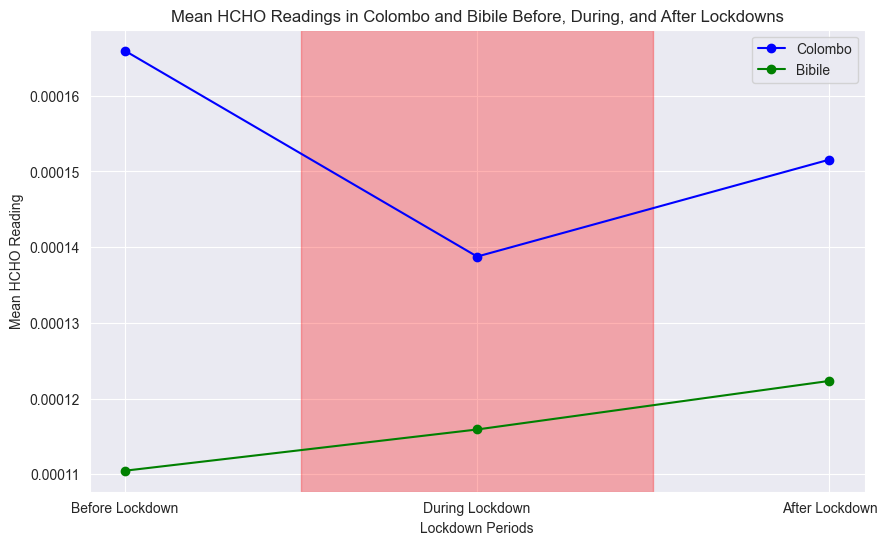

In [6]:
colombo_df["Current Date"] = pd.to_datetime(colombo_df["Current Date"])
bibile_df["Current Date"] = pd.to_datetime(bibile_df["Current Date"])
# Filter data for Colombo during lockdown
colombo_lockdown_df = colombo_df[(colombo_df['Current Date'] >= lockdown_start_date) & (colombo_df['Current Date'] <= lockdown_end_date)]

# Filter data for Bibile during lockdown
bibile_lockdown_df = bibile_df[(bibile_df['Current Date'] >= lockdown_start_date) & (bibile_df['Current Date'] <= lockdown_end_date)]

# Calculate mean HCHO readings for Colombo
colombo_means = [
    colombo_df[colombo_df['Current Date'] < lockdown_start_date]['HCHO reading'].mean(),
    colombo_lockdown_df['HCHO reading'].mean(),
    colombo_df[colombo_df['Current Date'] > lockdown_end_date]['HCHO reading'].mean()
]

print(f'Mean HCHO reading in Colombo before lockdown: {colombo_means[0]}')
print(f'Mean HCHO reading in Colombo during lockdown: {colombo_means[1]}')
print(f'Mean HCHO reading in Colombo after lockdown: {colombo_means[2]}\n')

# Calculate mean HCHO readings for Bibile
bibile_means = [
    bibile_df[bibile_df['Current Date'] < lockdown_start_date]['HCHO reading'].mean(),
    bibile_lockdown_df['HCHO reading'].mean(),
    bibile_df[bibile_df['Current Date'] > lockdown_end_date]['HCHO reading'].mean()
]
print(f'Mean HCHO reading in Bibile before lockdown: {bibile_means[0]}')
print(f'Mean HCHO reading in Bibile during lockdown: {bibile_means[1]}')
print(f'Mean HCHO reading in Bibile after lockdown: {bibile_means[2]}')

# Plotting
labels = ['Before Lockdown', 'During Lockdown', 'After Lockdown']
x = range(len(labels))

plt.figure(figsize=(10, 6))

# Plotting mean HCHO readings for Colombo
plt.plot(x, colombo_means, marker='o', linestyle='-', color='blue', label='Colombo')

# Plotting mean HCHO readings for Bibile
plt.plot(x, bibile_means, marker='o', linestyle='-', color='green', label='Bibile')

# Highlighting the lockdown period
lockdown_start = 1  # Index of 'During Lockdown' in the labels
plt.axvspan(lockdown_start - 0.5, lockdown_start + 0.5, color='red', alpha=0.3)

plt.xticks(x, labels)
plt.xlabel('Lockdown Periods')
plt.ylabel('Mean HCHO Reading')
plt.title('Mean HCHO Readings in Colombo and Bibile Before, During, and After Lockdowns')
plt.grid(True)
plt.legend()
plt.show()

### Rural VS Urban

In [7]:
rural_df = pd.concat([colombo_df, kandy_df, kurunegala_df, jaffna_df, nuwaraEliya_df])
rural_df = rural_df.drop(columns=['Unnamed: 0'])
rural_df["Current Date"]= pd.to_datetime(rural_df["Current Date"])

urban_df = pd.concat([bibile_df, deniyaya_df])
urban_df = urban_df.drop(columns=['Unnamed: 0'])
urban_df["Current Date"]= pd.to_datetime(urban_df["Current Date"])

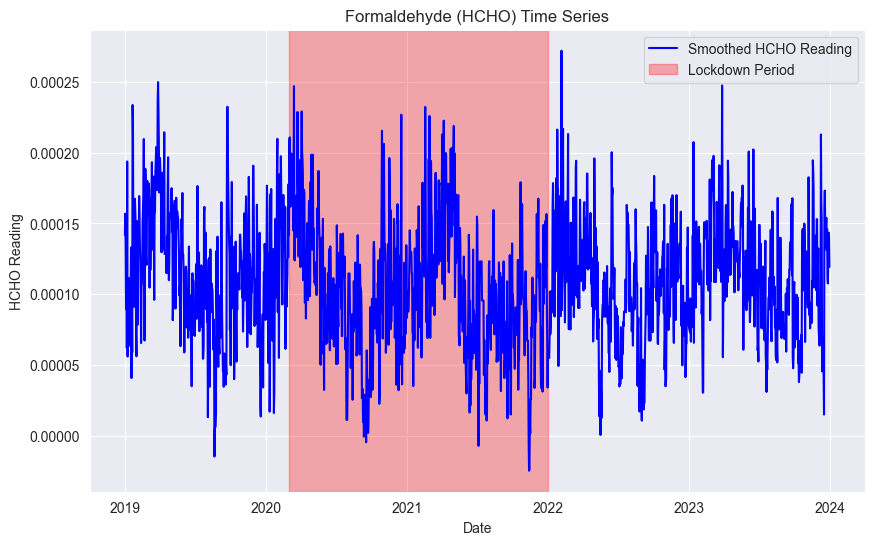

In [8]:
# Aggregate data by date and take the mean of HCHO readings for each day
data_aggregated = rural_df.groupby('Current Date')['HCHO reading'].mean().reset_index()

# Sort the aggregated DataFrame by date
data_sorted = data_aggregated.sort_values(by='Current Date')

# Plot the time series data (Date vs HCHO readings) with a smoother curve
plt.figure(figsize=(10, 6))

# Smoothing the curve with interpolation
x_smooth = pd.date_range(start=data_sorted['Current Date'].min(), end=data_sorted['Current Date'].max(), freq='D')
y_smooth = make_interp_spline(data_sorted['Current Date'], data_sorted['HCHO reading'])(x_smooth)

plt.plot(x_smooth, y_smooth, color='blue', linestyle='-', label='Smoothed HCHO Reading')
plt.title('Formaldehyde (HCHO) Time Series')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.grid(True)

# Highlight the COVID-19 lockdown period
plt.axvspan(lockdown_start_date, lockdown_end_date, color='red', alpha=0.3, label='Lockdown Period')

# Add legend
plt.legend()

plt.show()

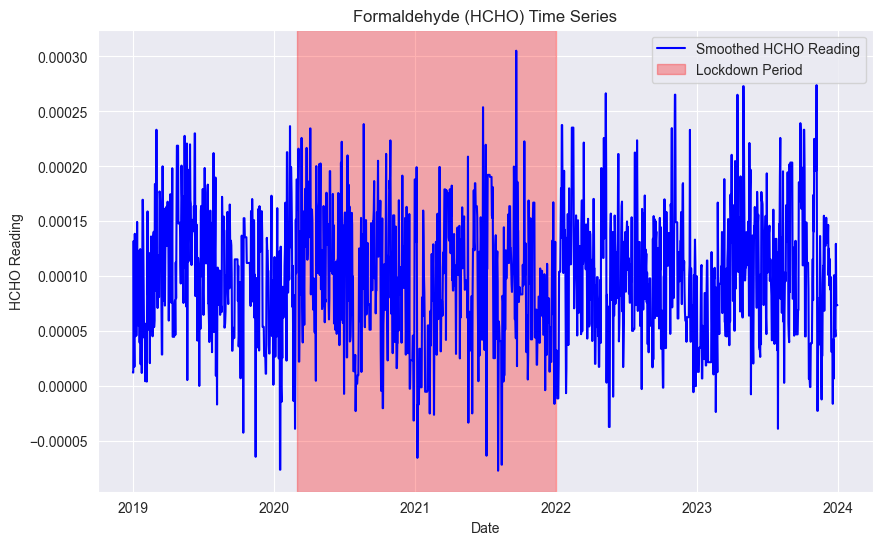

In [9]:
# Aggregate data by date and take the mean of HCHO readings for each day
data_aggregated = urban_df.groupby('Current Date')['HCHO reading'].mean().reset_index()

# Sort the aggregated DataFrame by date
data_sorted = data_aggregated.sort_values(by='Current Date')

# Plot the time series data (Date vs HCHO readings) with a smoother curve
plt.figure(figsize=(10, 6))

# Smoothing the curve with interpolation
x_smooth = pd.date_range(start=data_sorted['Current Date'].min(), end=data_sorted['Current Date'].max(), freq='D')
y_smooth = make_interp_spline(data_sorted['Current Date'], data_sorted['HCHO reading'])(x_smooth)

plt.plot(x_smooth, y_smooth, color='blue', linestyle='-', label='Smoothed HCHO Reading')
plt.title('Formaldehyde (HCHO) Time Series')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.grid(True)

# Highlight the COVID-19 lockdown period
plt.axvspan(lockdown_start_date, lockdown_end_date, color='red', alpha=0.3, label='Lockdown Period')

# Add legend
plt.legend()

plt.show()

Mean HCHO reading of Rural cities before lockdown: 0.00011622709053876917
Mean HCHO reading of Rural cities during lockdown: 0.00010320185563276953
Mean HCHO reading of Rural cities after lockdown: 0.00010933615010464461

Mean HCHO reading of Urban cities before lockdown: 0.00010266552352277582
Mean HCHO reading of Urban cities during lockdown: 9.603926710950611e-05
Mean HCHO reading of Urban cities after lockdown: 0.00010157940345310995


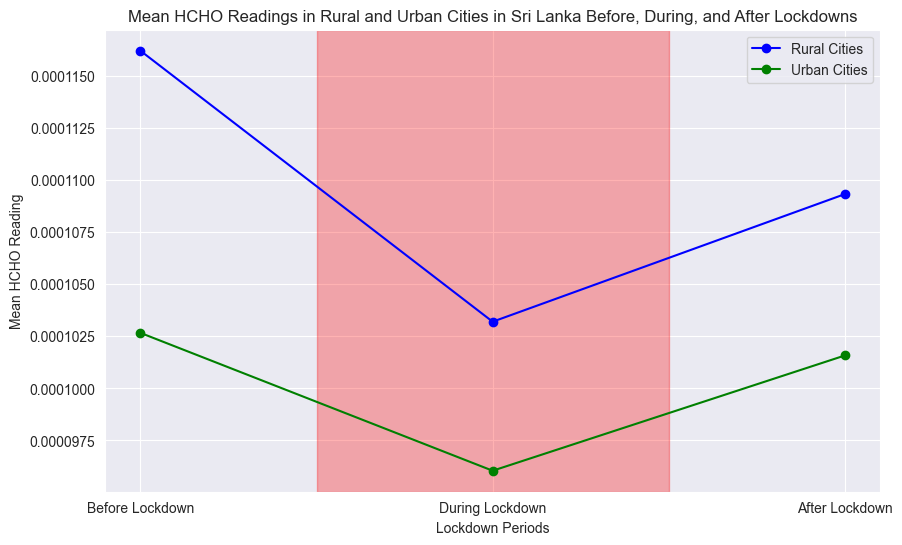

In [10]:
# Filter data for Colombo during lockdown
rural_lockdown_df = rural_df[(rural_df['Current Date'] >= lockdown_start_date) & (rural_df['Current Date'] <= lockdown_end_date)]

# Filter data for Bibile during lockdown
urban_df_lockdown_df = urban_df[(urban_df['Current Date'] >= lockdown_start_date) & (urban_df['Current Date'] <= lockdown_end_date)]

# Calculate mean HCHO readings for Rural cities
rural_means = [
    rural_df[rural_df['Current Date'] < lockdown_start_date]['HCHO reading'].mean(),
    rural_lockdown_df['HCHO reading'].mean(),
    rural_df[rural_df['Current Date'] > lockdown_end_date]['HCHO reading'].mean()
]

print(f'Mean HCHO reading of Rural cities before lockdown: {rural_means[0]}')
print(f'Mean HCHO reading of Rural cities during lockdown: {rural_means[1]}')
print(f'Mean HCHO reading of Rural cities after lockdown: {rural_means[2]}\n')

# Calculate mean HCHO readings for Urban cities
urban_means = [
    urban_df[urban_df['Current Date'] < lockdown_start_date]['HCHO reading'].mean(),
    urban_df_lockdown_df['HCHO reading'].mean(),
    urban_df[urban_df['Current Date'] > lockdown_end_date]['HCHO reading'].mean()
]

print(f'Mean HCHO reading of Urban cities before lockdown: {urban_means[0]}')
print(f'Mean HCHO reading of Urban cities during lockdown: {urban_means[1]}')
print(f'Mean HCHO reading of Urban cities after lockdown: {urban_means[2]}')

# Plotting
labels = ['Before Lockdown', 'During Lockdown', 'After Lockdown']
x = range(len(labels))

plt.figure(figsize=(10, 6))

# Plotting mean HCHO readings for rural cities
plt.plot(x, rural_means, marker='o', linestyle='-', color='blue', label='Rural Cities')

# Plotting mean HCHO readings for urban cities
plt.plot(x, urban_means, marker='o', linestyle='-', color='green', label='Urban Cities')

# Highlighting the lockdown period
lockdown_start = 1  # Index of 'During Lockdown' in the labels
plt.axvspan(lockdown_start - 0.5, lockdown_start + 0.5, color='red', alpha=0.3)

plt.xticks(x, labels)
plt.xlabel('Lockdown Periods')
plt.ylabel('Mean HCHO Reading')
plt.title('Mean HCHO Readings in Rural and Urban Cities in Sri Lanka Before, During, and After Lockdowns')
plt.grid(True)
plt.legend()
plt.show()

# Analyzing How External factors affect on HCHO readings

In [11]:
weather_df = pd.read_csv("DataSets/pre_proecessed_weather_data.csv")
weather_df

,year,month,day,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,shortwave_radiation_sum,rain_sum,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,latitude,longitude,city
0,2010,1,1,2,30.0,22.7,26.1,34.4,25.2,29.2,20.92,0.0,11.7,27.4,20,7.000000,79.899994,Colombo
1,2010,1,2,51,29.9,23.5,26.2,33.8,26.2,29.8,17.71,0.1,13.0,27.0,24,7.000000,79.899994,Colombo
2,2010,1,3,51,29.5,23.2,26.0,34.3,26.3,29.9,17.76,0.6,12.3,27.4,16,7.000000,79.899994,Colombo
3,2010,1,4,2,28.9,21.9,25.3,31.6,23.4,27.8,16.50,0.0,17.0,34.6,356,7.000000,79.899994,Colombo
4,2010,1,5,1,28.1,21.3,24.5,30.1,23.1,26.1,23.61,0.0,18.7,37.1,355,7.000000,79.899994,Colombo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147475,2023,6,13,63,29.2,24.7,26.6,35.4,29.2,31.6,17.20,17.0,15.6,43.6,229,6.900002,80.000000,Oruwala
147476,2023,6,14,61,29.1,25.4,26.9,34.3,30.4,32.0,14.97,7.3,16.4,40.0,224,6.900002,80.000000,Oruwala
147477,2023,6,15,51,29.8,25.5,27.3,36.6,30.7,32.7,15.89,3.2,12.6,32.4,218,6.900002,80.000000,Oruwala
147478,2023,6,16,53,30.5,25.5,27.7,36.2,30.1,32.4,19.21,5.6,20.5,41.8,236,6.900002,80.000000,Oruwala


we need only the data after 2019 year. So lets filter out required other data 

In [12]:
weather_df = weather_df[weather_df["year"] > 2018 ]

In [13]:
weather_df

,year,month,day,weathercode,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,shortwave_radiation_sum,rain_sum,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,latitude,longitude,city
3287,2019,1,1,2,30.0,23.1,26.1,33.2,24.7,28.7,19.77,0.0,14.4,29.9,14,7.000000,79.899994,Colombo
3288,2019,1,2,1,29.4,22.7,25.7,32.6,24.5,27.3,21.45,0.0,16.6,31.0,11,7.000000,79.899994,Colombo
3289,2019,1,3,0,30.2,22.6,26.1,33.4,23.4,27.8,21.68,0.0,16.0,31.0,10,7.000000,79.899994,Colombo
3290,2019,1,4,3,30.6,22.3,26.0,33.1,23.2,27.6,22.95,0.0,16.9,35.6,13,7.000000,79.899994,Colombo
3291,2019,1,5,3,31.1,22.6,26.4,34.6,24.6,28.9,21.65,0.0,16.8,32.4,8,7.000000,79.899994,Colombo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147475,2023,6,13,63,29.2,24.7,26.6,35.4,29.2,31.6,17.20,17.0,15.6,43.6,229,6.900002,80.000000,Oruwala
147476,2023,6,14,61,29.1,25.4,26.9,34.3,30.4,32.0,14.97,7.3,16.4,40.0,224,6.900002,80.000000,Oruwala
147477,2023,6,15,51,29.8,25.5,27.3,36.6,30.7,32.7,15.89,3.2,12.6,32.4,218,6.900002,80.000000,Oruwala
147478,2023,6,16,53,30.5,25.5,27.7,36.2,30.1,32.4,19.21,5.6,20.5,41.8,236,6.900002,80.000000,Oruwala


For the comparison the features that we need are mean temeperatures and the rain summations, windspeeds, windgusts and latitude and longtitudes only, Therefore this needs to be get rid of other features.

In [14]:
weather_df = weather_df.drop(columns=['day','temperature_2m_max','temperature_2m_min','apparent_temperature_max','apparent_temperature_min','shortwave_radiation_sum','winddirection_10m_dominant'])

In [15]:
weather_df

,year,month,weathercode,temperature_2m_mean,apparent_temperature_mean,rain_sum,windspeed_10m_max,windgusts_10m_max,latitude,longitude,city
3287,2019,1,2,26.1,28.7,0.0,14.4,29.9,7.000000,79.899994,Colombo
3288,2019,1,1,25.7,27.3,0.0,16.6,31.0,7.000000,79.899994,Colombo
3289,2019,1,0,26.1,27.8,0.0,16.0,31.0,7.000000,79.899994,Colombo
3290,2019,1,3,26.0,27.6,0.0,16.9,35.6,7.000000,79.899994,Colombo
3291,2019,1,3,26.4,28.9,0.0,16.8,32.4,7.000000,79.899994,Colombo
...,...,...,...,...,...,...,...,...,...,...,...
147475,2023,6,63,26.6,31.6,17.0,15.6,43.6,6.900002,80.000000,Oruwala
147476,2023,6,61,26.9,32.0,7.3,16.4,40.0,6.900002,80.000000,Oruwala
147477,2023,6,51,27.3,32.7,3.2,12.6,32.4,6.900002,80.000000,Oruwala
147478,2023,6,53,27.7,32.4,5.6,20.5,41.8,6.900002,80.000000,Oruwala


### Comparing how Temperature affects on HCHO readings

In [16]:
colombo_df['year'] = pd.to_datetime(colombo_df['Current Date']).dt.year
colombo_df['month'] = pd.to_datetime(colombo_df['Current Date']).dt.month


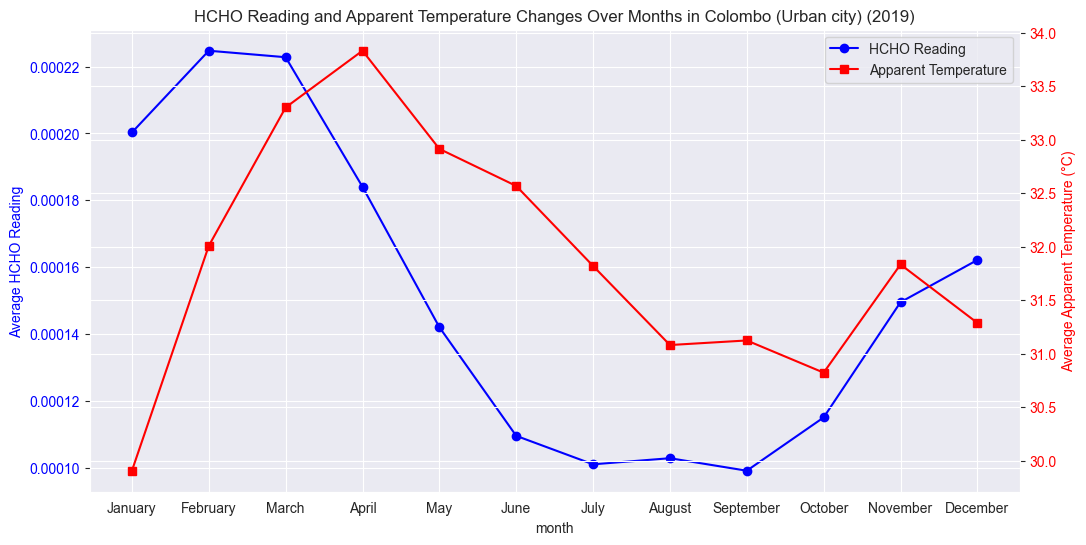

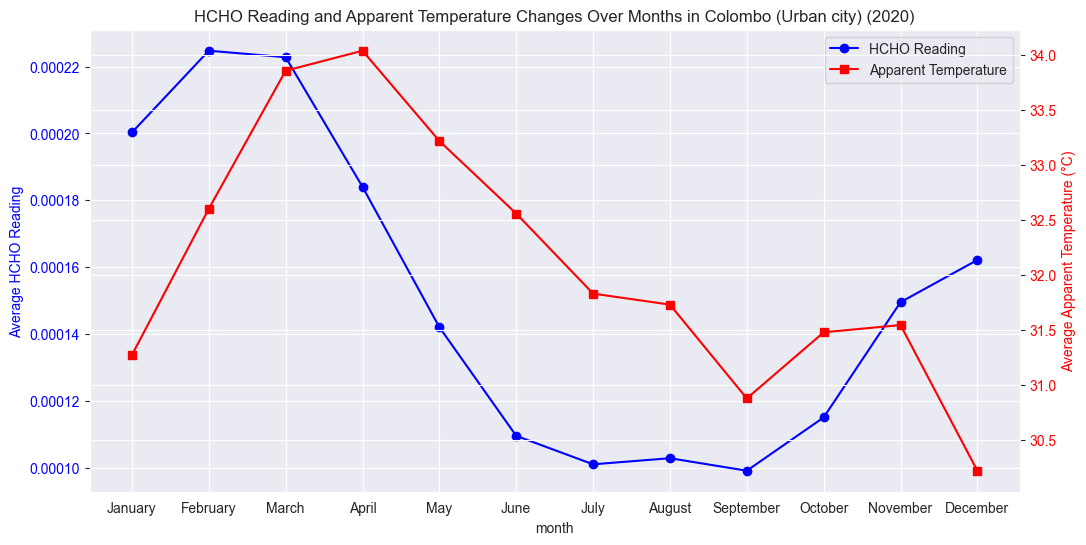

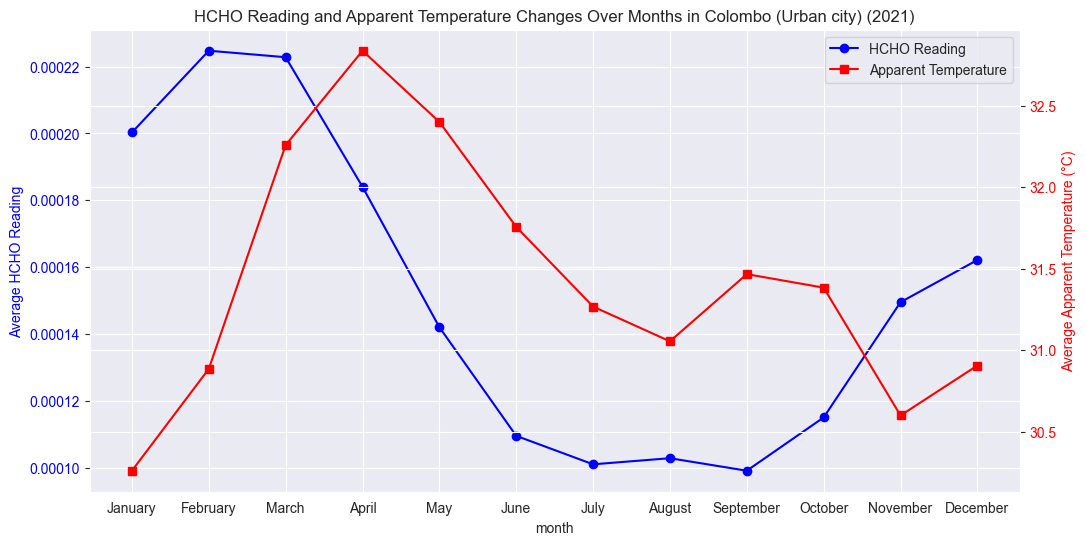

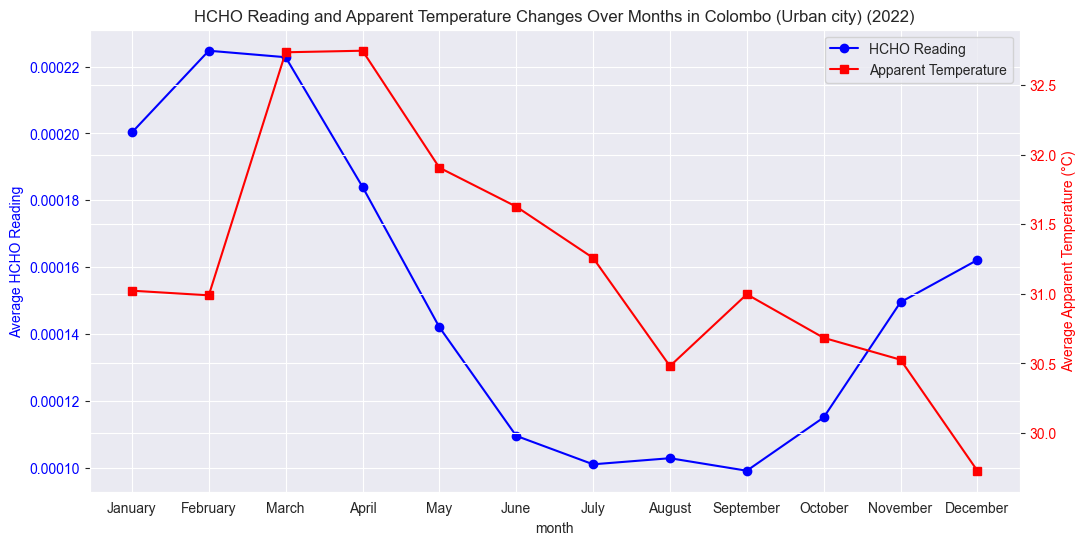

In [17]:
# Loop through each year from 2019 to 2023
for year in range(2019, 2023):
    
    # Group by month and calculate the mean HCHO reading for each month
    monthly_means_hcho = colombo_df.groupby('month')['HCHO reading'].mean()
    
    # Filter the weather data for the current year and city 'Colombo'
    colombo_year = weather_df[(weather_df['city'] == 'Colombo') & (weather_df['year'] == year)]
    
    # Group by month and calculate the mean apparent temperature for each month
    monthly_avg_apparent_temp = colombo_year.groupby('month')['apparent_temperature_mean'].mean()
    
    # Create a new plot for the current year
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Plot HCHO readings on primary y-axis
    ax1.plot(monthly_means_hcho, marker='o', color='blue', label='HCHO Reading')
    ax1.set_xlabel('month')
    ax1.set_ylabel('Average HCHO Reading', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Create secondary y-axis for apparent temperature
    ax2 = ax1.twinx()
    ax2.plot(monthly_avg_apparent_temp, marker='s', color='red', label='Apparent Temperature')
    ax2.set_ylabel('Average Apparent Temperature (°C)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Add legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper right')
    
    # Set x-axis ticks
    ax1.set_xticks(range(1, 13))
    ax1.set_xticklabels([calendar.month_name[i] for i in range(1, 13)])
    
    plt.title(f'HCHO Reading and Apparent Temperature Changes Over Months in Colombo (Urban city) ({year})')
    plt.grid(True)
    plt.show()

In [18]:
# Filter the weather data for the Colombo city
colombo_weather = weather_df[weather_df['city'] == 'Colombo']
colombo_weather


,year,month,weathercode,temperature_2m_mean,apparent_temperature_mean,rain_sum,windspeed_10m_max,windgusts_10m_max,latitude,longitude,city
3287,2019,1,2,26.1,28.7,0.0,14.4,29.9,7.0,79.899994,Colombo
3288,2019,1,1,25.7,27.3,0.0,16.6,31.0,7.0,79.899994,Colombo
3289,2019,1,0,26.1,27.8,0.0,16.0,31.0,7.0,79.899994,Colombo
3290,2019,1,3,26.0,27.6,0.0,16.9,35.6,7.0,79.899994,Colombo
3291,2019,1,3,26.4,28.9,0.0,16.8,32.4,7.0,79.899994,Colombo
...,...,...,...,...,...,...,...,...,...,...,...
4911,2023,6,63,27.0,32.2,18.1,16.2,43.6,7.0,79.899994,Colombo
4912,2023,6,63,27.4,32.8,8.9,17.7,42.1,7.0,79.899994,Colombo
4913,2023,6,53,27.8,33.7,3.9,13.2,34.2,7.0,79.899994,Colombo
4914,2023,6,55,28.2,33.0,6.0,21.3,41.0,7.0,79.899994,Colombo


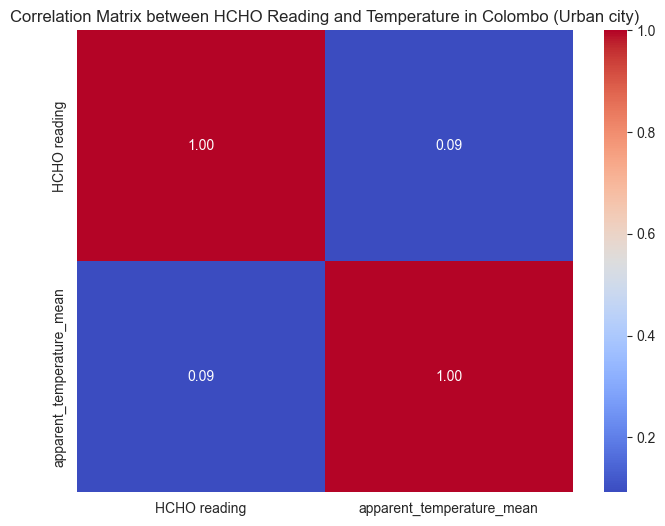

In [19]:
# Merge HCHO readings and weather data on month and year
merged_df = pd.merge(colombo_df, colombo_weather, on=['month', 'year'])

# Select relevant columns for correlation matrix
correlation_data = merged_df[['HCHO reading','apparent_temperature_mean']]

# Compute correlation matrix
correlation_matrix = correlation_data.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix between HCHO Reading and Temperature in Colombo (Urban city)')
plt.show()

In [20]:
deniyaya_df['year'] = pd.to_datetime(deniyaya_df['Current Date']).dt.year
deniyaya_df['month'] = pd.to_datetime(deniyaya_df['Current Date']).dt.month

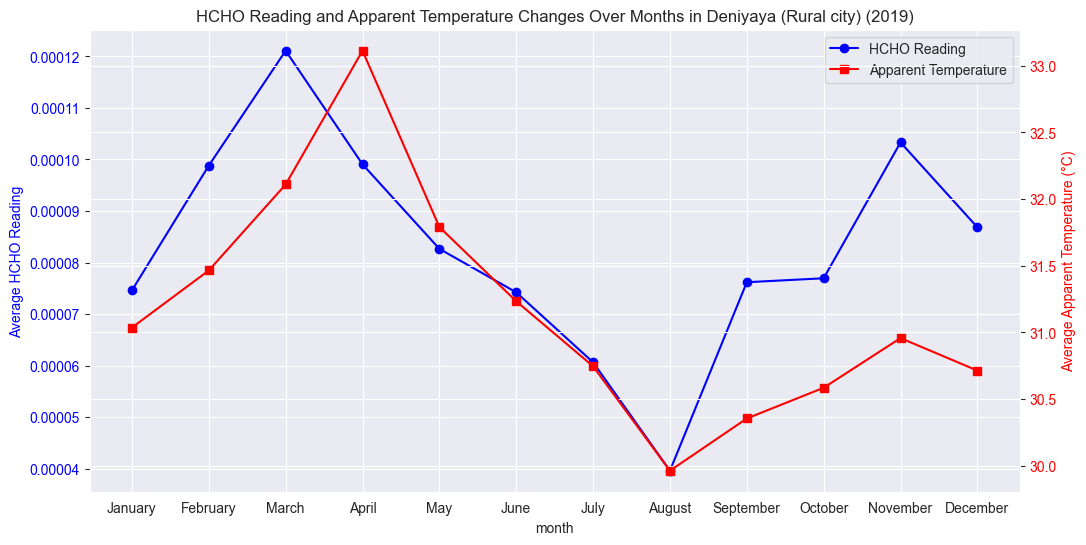

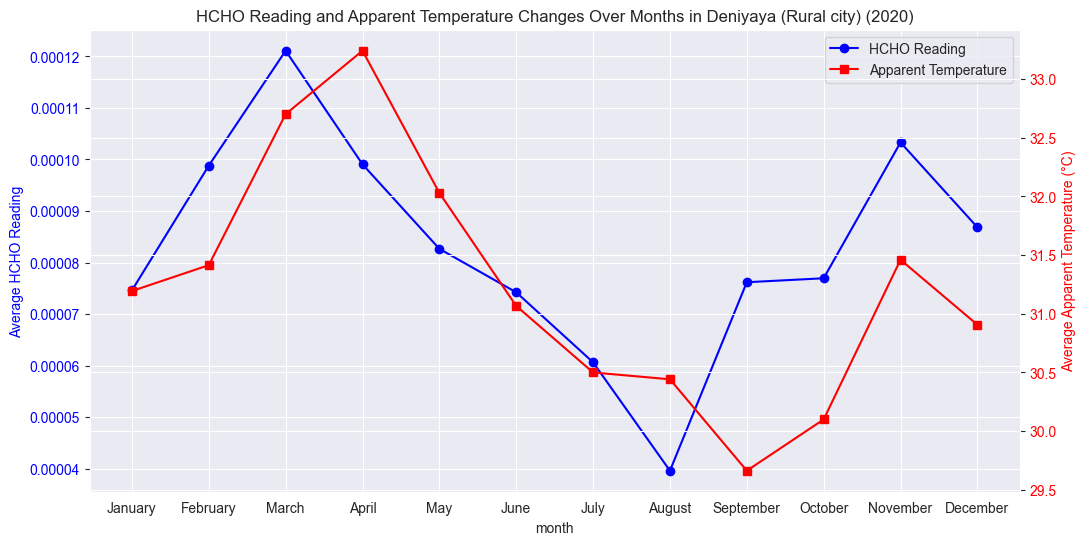

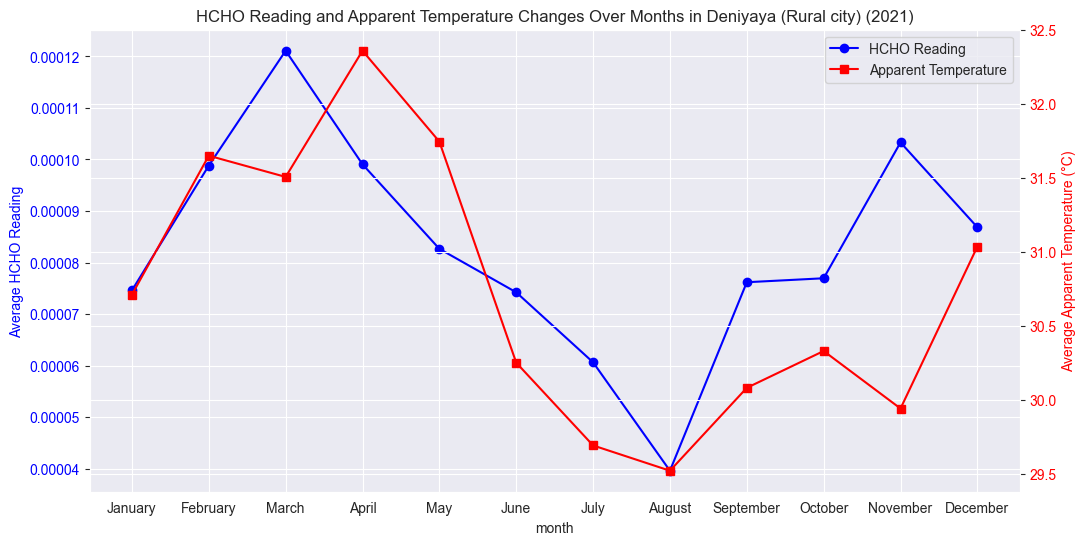

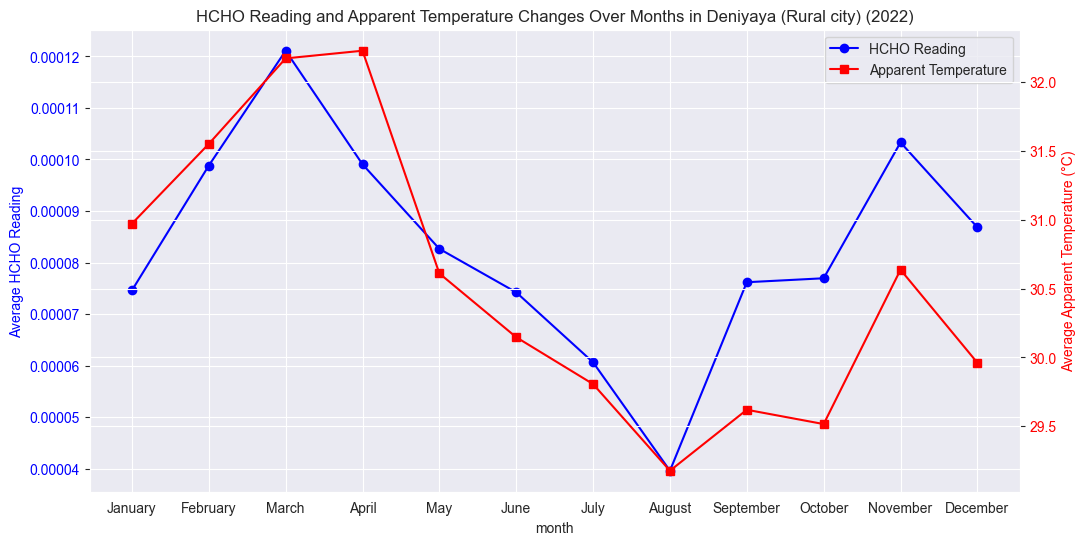

In [21]:
# Loop through each year from 2019 to 2023
for year in range(2019, 2023):
    
    # Group by month and calculate the mean HCHO reading for each month
    monthly_means_hcho = deniyaya_df.groupby('month')['HCHO reading'].mean()
    
    # Filter the weather data for the current year and city 'Deniyaya'
    deniyaya_year = weather_df[(weather_df['city'] == 'Matara') & (weather_df['year'] == year)]
    
    # Group by month and calculate the mean apparent temperature for each month
    monthly_avg_apparent_temp = deniyaya_year.groupby('month')['apparent_temperature_mean'].mean()
    
    # Create a new plot for the current year
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Plot HCHO readings on primary y-axis
    ax1.plot(monthly_means_hcho, marker='o', color='blue', label='HCHO Reading')
    ax1.set_xlabel('month')
    ax1.set_ylabel('Average HCHO Reading', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Create secondary y-axis for apparent temperature
    ax2 = ax1.twinx()
    ax2.plot(monthly_avg_apparent_temp, marker='s', color='red', label='Apparent Temperature')
    ax2.set_ylabel('Average Apparent Temperature (°C)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    # Add legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc='upper right')
    
    # Set x-axis ticks
    ax1.set_xticks(range(1, 13))
    ax1.set_xticklabels([calendar.month_name[i] for i in range(1, 13)])
    
    plt.title(f'HCHO Reading and Apparent Temperature Changes Over Months in Deniyaya (Rural city) ({year})')
    plt.grid(True)
    plt.show()

In [22]:
deniyaya_weather = weather_df[weather_df['city'] == 'Matara']

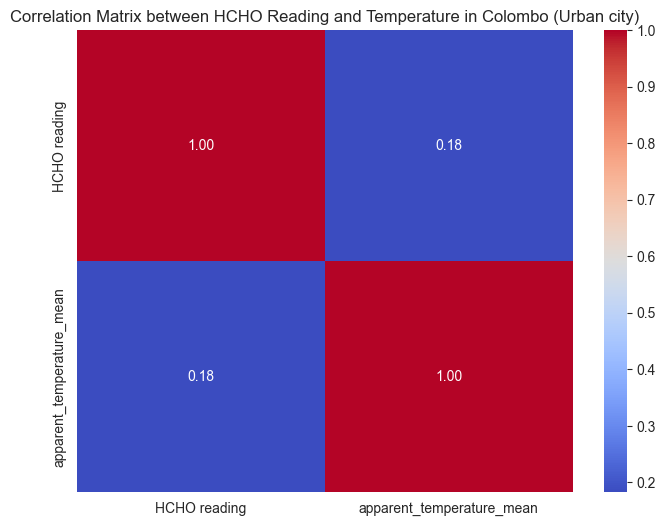

In [23]:
# Merge HCHO readings and weather data on month and year
merged_df = pd.merge(deniyaya_df, deniyaya_weather, on=['month', 'year'])

# Select relevant columns for correlation matrix
correlation_data = merged_df[['HCHO reading','apparent_temperature_mean']]

# Compute correlation matrix
correlation_matrix = correlation_data.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix between HCHO Reading and Temperature in Colombo (Urban city)')
plt.show()

### Comparing how rain affects on HCHO readings

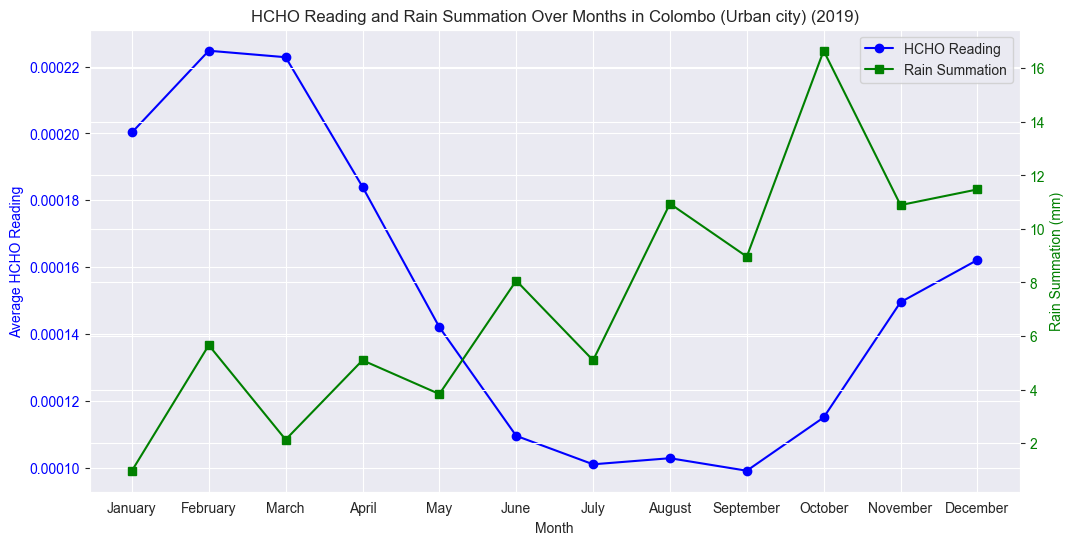

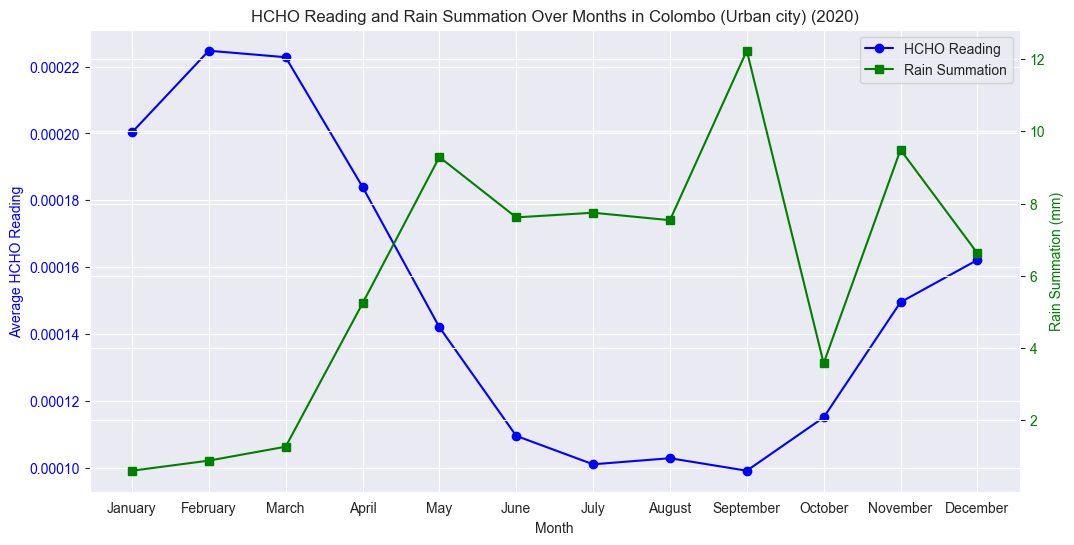

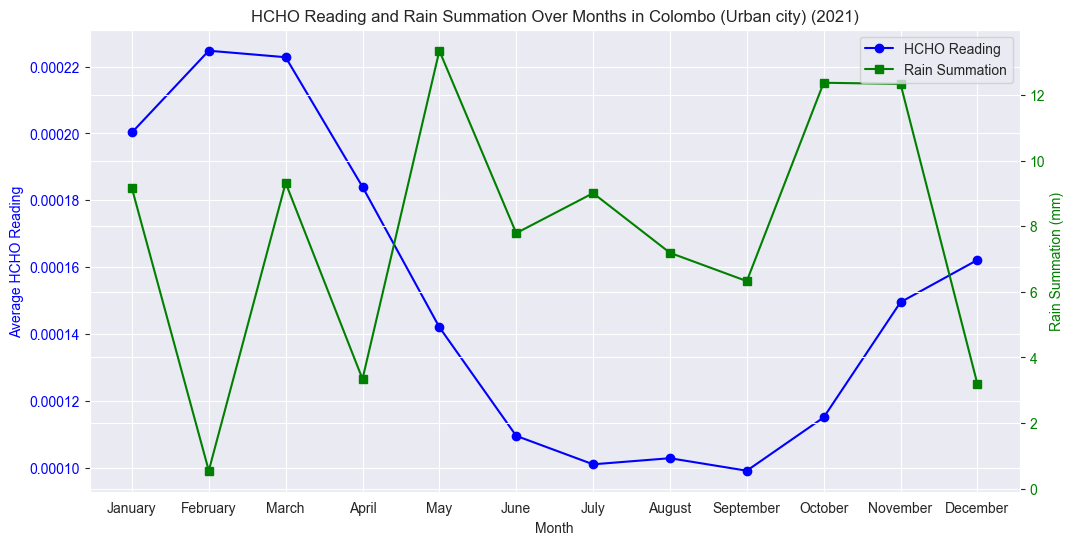

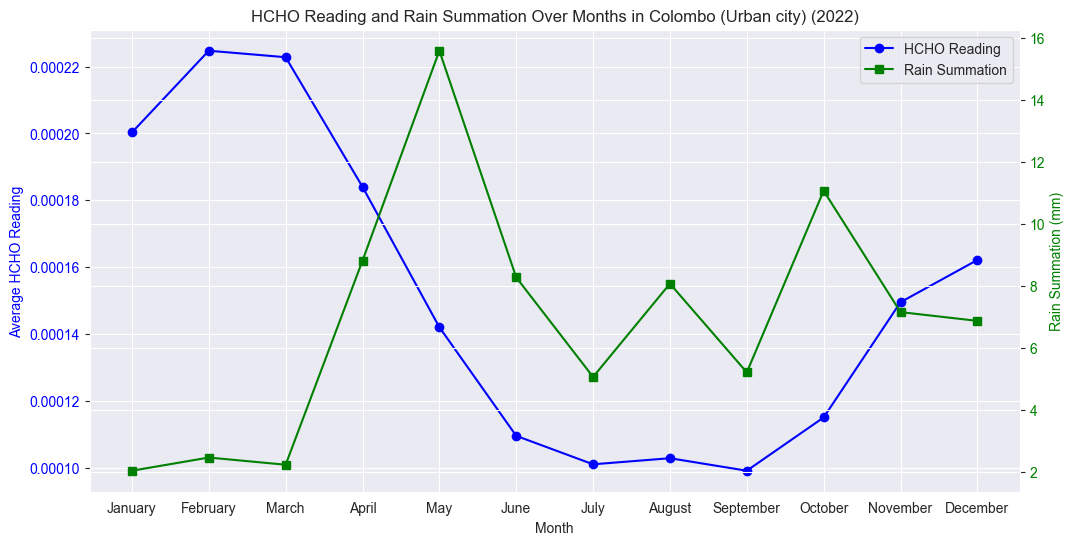

In [24]:
# Loop through each year from 2019 to 2023
for year in range(2019, 2023):
    # Calculate monthly mean HCHO readings
    monthly_means = colombo_df.groupby('month')['HCHO reading'].mean()

    # Filter weather data for the specific year and city
    weather_year = weather_df[(weather_df['city'] == 'Colombo') & (weather_df['year'] == year)]
    # Calculate monthly average rain summation
    monthly_avg_rain_sum = weather_year.groupby('month')['rain_sum'].mean()

    # Create plot
    fig, ax1 = plt.subplots(figsize=(12, 6))
    # Plot HCHO readings on primary y-axis
    ax1.plot(monthly_means.index, monthly_means.values, marker='o', color='blue', label='HCHO Reading')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Average HCHO Reading', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create secondary y-axis for rain summation
    ax2 = ax1.twinx()
    ax2.plot(monthly_avg_rain_sum.index, monthly_avg_rain_sum.values, marker='s', color='green', label='Rain Summation')
    ax2.set_ylabel('Rain Summation (mm)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Add legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')

    # Set x-axis ticks
    ax1.set_xticks(range(1, 13))
    ax1.set_xticklabels([calendar.month_name[i] for i in range(1, 13)])

    # Title and grid
    plt.title(f'HCHO Reading and Rain Summation Over Months in Colombo (Urban city) ({year})')
    plt.grid(True)

    # Show plot
    plt.show()

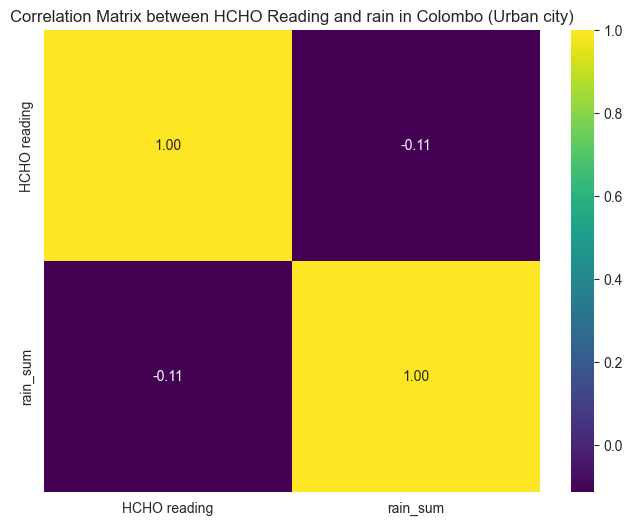

In [31]:
# Merge HCHO readings and weather data on month and year
merged_df = pd.merge(colombo_df, colombo_weather, on=['month', 'year'])

# Select relevant columns for correlation matrix
correlation_data = merged_df[['HCHO reading','rain_sum']]

# Compute correlation matrix
correlation_matrix = correlation_data.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix between HCHO Reading and rain in Colombo (Urban city)')
plt.show()

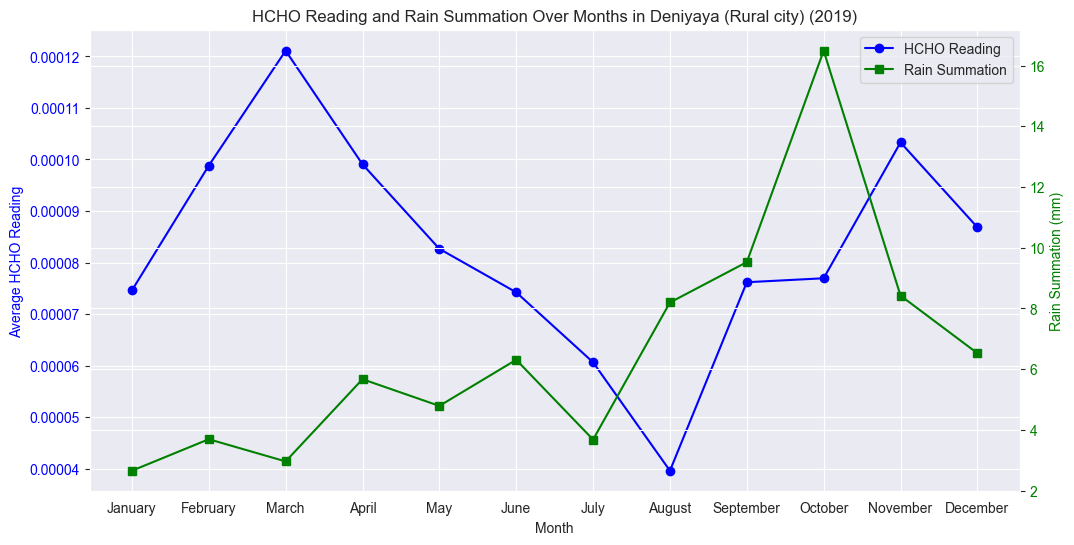

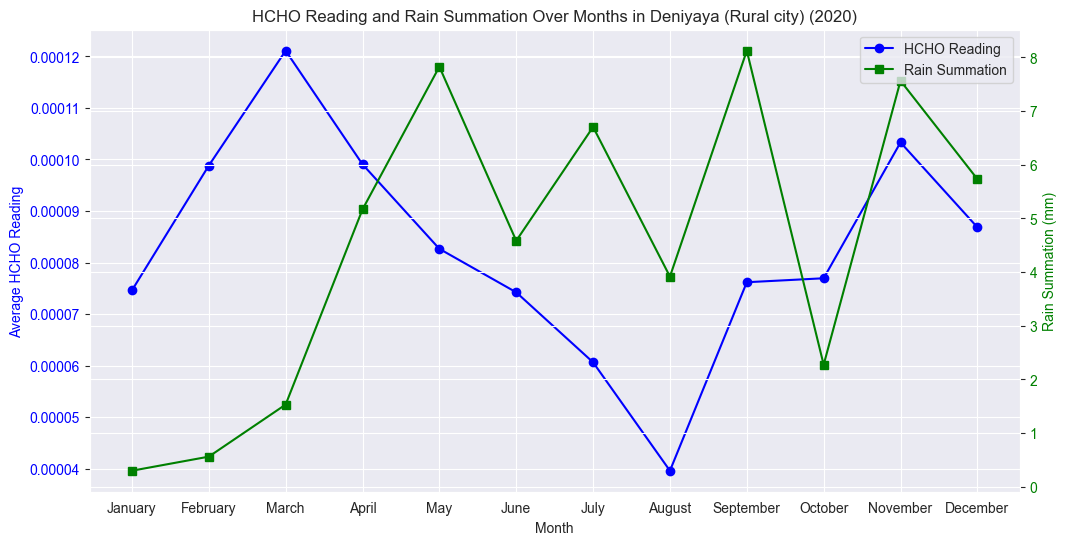

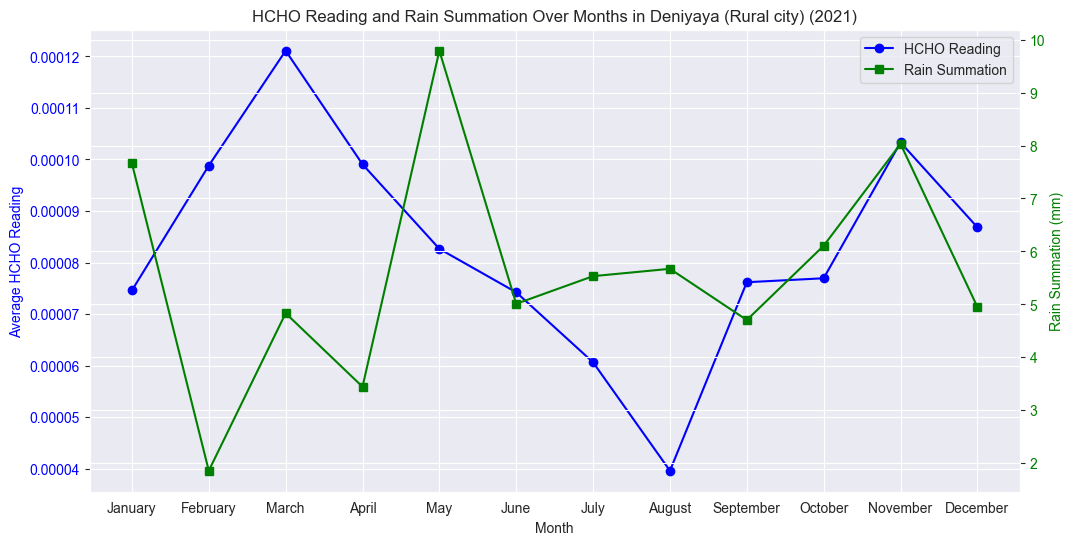

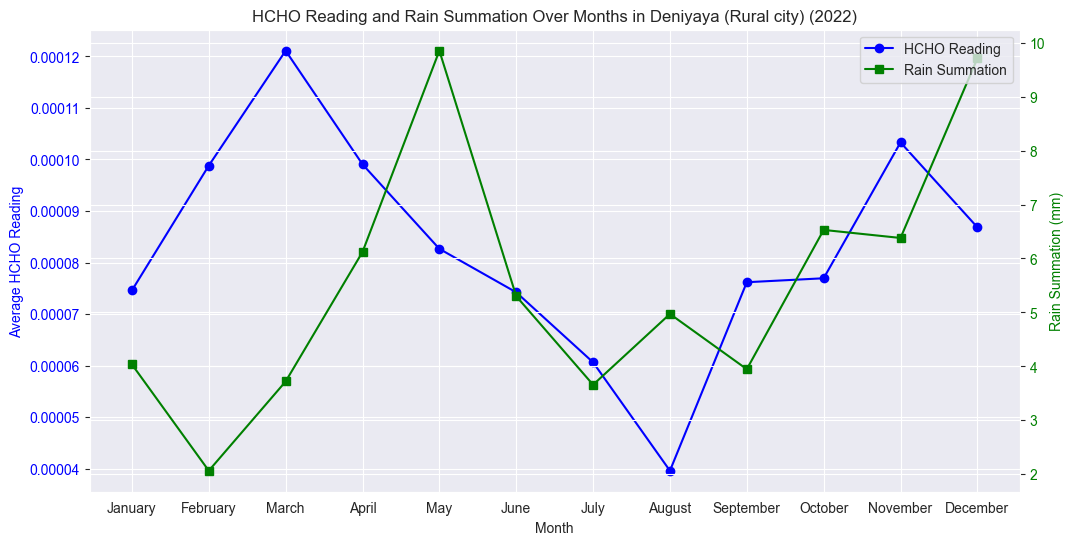

In [26]:
# Loop through each year from 2019 to 2023
for year in range(2019, 2023):
    # Calculate monthly mean HCHO readings
    monthly_means = deniyaya_df.groupby('month')['HCHO reading'].mean()

    # Filter weather data for the specific year and city
    weather_year = weather_df[(weather_df['city'] == 'Matara') & (weather_df['year'] == year)]
    # Calculate monthly average rain summation
    monthly_avg_rain_sum = weather_year.groupby('month')['rain_sum'].mean()

    # Create plot
    fig, ax1 = plt.subplots(figsize=(12, 6))
    # Plot HCHO readings on primary y-axis
    ax1.plot(monthly_means.index, monthly_means.values, marker='o', color='blue', label='HCHO Reading')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Average HCHO Reading', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create secondary y-axis for rain summation
    ax2 = ax1.twinx()
    ax2.plot(monthly_avg_rain_sum.index, monthly_avg_rain_sum.values, marker='s', color='green', label='Rain Summation')
    ax2.set_ylabel('Rain Summation (mm)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Add legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper right')

    # Set x-axis ticks
    ax1.set_xticks(range(1, 13))
    ax1.set_xticklabels([calendar.month_name[i] for i in range(1, 13)])

    # Title and grid
    plt.title(f'HCHO Reading and Rain Summation Over Months in Deniyaya (Rural city) ({year})')
    plt.grid(True)

    # Show plot
    plt.show()

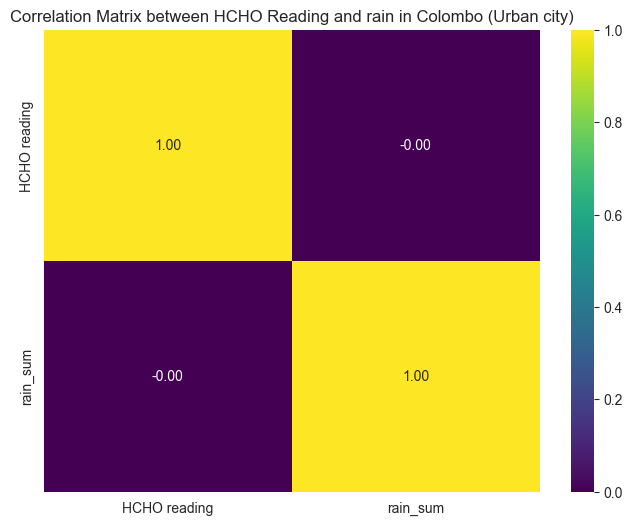

In [32]:
# Merge HCHO readings and weather data on month and year
merged_df = pd.merge(deniyaya_df, deniyaya_weather, on=['month', 'year'])

# Select relevant columns for correlation matrix
correlation_data = merged_df[['HCHO reading','rain_sum']]

# Compute correlation matrix
correlation_matrix = correlation_data.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix between HCHO Reading and rain in Colombo (Urban city)')
plt.show()